# Proyek Analisis Data: [Bike Sharing Dataset - (https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)]
- **Nama:** [Syakira]
- **Email:** [Syakirasyakira2310@gmail.com]
- **ID Dicoding:** [syakira_kiraa]

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren bulanan penggunaan sepeda dari tahun 2011 hingga 2012?
2. Apa saja tiga variabel numerik yang paling berkorelasi dengan jumlah peminjaman sepeda bulanan pada tahun 2012?"
3. Bagaimana segmentasi pengguna sepeda berdasarkan jumlah peminjaman kasual dan terdaftar selama musim gugur 2012?"

## Import Semua Packages/Library yang Digunakan

In [84]:
 # Install Packages
!pip install pandas matplotlib seaborn

In [85]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import shutil
from sklearn.cluster import KMeans

# Untuk menampilkan grafik yang lebih bagus
%matplotlib inline


### 1. Data Wrangling

### 1.1 Gathering Data

In [86]:
# Mount Gdrive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
 # Gathering Data
path_day = "/content/drive/My Drive/Bike Sharing Dataset/day.csv"
day_df = pd.read_csv(path_day)
day_df

# Cek beberapa 5 baris pertama
print(day_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


**Insight:**



*   Melakukan mount  drive agar dataset yang ada di Gdrive dapat terbaca
*   Menampilkan lima baris pertama dari masing masing dataset untuk melihat struktur data


### 1.2 Assessing Data

1.2.1 Periksa Data Duplikat

In [88]:
# 1.2.2 Periksa Data Duplikat
duplicates_day = day_df.duplicated().sum()
print(f"\nJumlah data duplikat di day.csv: {duplicates_day}")


Jumlah data duplikat di day.csv: 0


1.2.2 Periksa Nilai Kosong

In [131]:
 day_df.isnull().sum()


,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
hum,0


1.2.3 Statistik Ringkasan

In [130]:
print("\nStatistik Ringkasan day.csv:")
print(day_df.describe())



Statistik Ringkasan day.csv:
                    dteday           yr  weathersit        temp         hum  \
count                  731   731.000000  731.000000  731.000000  731.000000   
mean   2012-01-01 00:00:00  2011.500684    1.395349   20.314637   62.792066   
min    2011-01-01 00:00:00  2011.000000    1.000000    2.000000    0.000000   
25%    2011-07-02 12:00:00  2011.000000    1.000000   14.000000   52.000000   
50%    2012-01-01 00:00:00  2012.000000    1.000000   20.000000   63.000000   
75%    2012-07-01 12:00:00  2012.000000    2.000000   27.000000   73.000000   
max    2012-12-31 00:00:00  2012.000000    3.000000   35.000000   97.000000   
std                    NaN     0.500342    0.544894    7.531453   14.263585   

        windspeed       casual   registered          cnt  
count  731.000000   731.000000   731.000000   731.000000  
mean    12.767442   848.176471  3656.172367  4504.348837  
min      2.000000     2.000000    20.000000    22.000000  
25%      9.000000   31

**Insight:**

- Mengecek apakah ada data yang duplikat dalam dataset day_df dan hour_df.

- Mengecek apakah ada nilai yang kosong (missing values) dalam dataset.
- Menampilkan statistik ringkasan dari dataset day_df

### 1.3 Cleaning Data

1.3.1 Menghapus Kolom yang Tidak Diperlukan

In [91]:
day_df = day_df.drop(columns=['instant', 'atemp'])


1.3.2 Mengonversi Tipe Data


In [92]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
print (day_df.dteday.dtype)

datetime64[ns]


In [93]:
day_df.replace({
    "season": {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "mnth": {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
             7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"},
    "holiday": {0: "Not Holiday", 1: "Holiday"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday",
                5: "Friday", 6: "Saturday"}
}, inplace=True)

In [94]:
# Menyesuaikan kolom temp, hum, dan windspeed agar sesuai dengan satuannya
day_df["temp"] = (day_df["temp"] * 41).round().astype(int)
day_df["hum"] = (day_df["hum"] * 100).round().astype(int)
day_df["windspeed"] = (day_df["windspeed"] * 67).round().astype(int)

In [95]:
day_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,January,Not Holiday,Saturday,Holiday,2,14,81,11,331,654,985
1,2011-01-02,Spring,2011,January,Not Holiday,Sunday,Holiday,2,15,70,17,131,670,801
2,2011-01-03,Spring,2011,January,Not Holiday,Monday,Working Day,1,8,44,17,120,1229,1349
3,2011-01-04,Spring,2011,January,Not Holiday,Tuesday,Working Day,1,8,59,11,108,1454,1562
4,2011-01-05,Spring,2011,January,Not Holiday,Wednesday,Working Day,1,9,44,13,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,Spring,2012,December,Not Holiday,Thursday,Working Day,2,10,65,23,247,1867,2114
727,2012-12-28,Spring,2012,December,Not Holiday,Friday,Working Day,2,10,59,10,644,2451,3095
728,2012-12-29,Spring,2012,December,Not Holiday,Saturday,Holiday,2,10,75,8,159,1182,1341
729,2012-12-30,Spring,2012,December,Not Holiday,Sunday,Holiday,1,10,48,24,364,1432,1796


1.3.3 Menyimpan Hasil Cleaning Data

In [96]:
# Menyimpan DataFrame ke file CSV
dataclean_analisis = "/content/drive/My Drive/Bike Sharing Dataset/dataclean_analisis.csv"
day_df.to_csv(dataclean_analisis, index=False)

print(f"DataFrame berhasil disimpan sebagai {dataclean_analisis}")

# Menampilkan link untuk mengunduh file
print(f" [Download dataclean_analisis.csv](sandbox:{dataclean_analisis})")

DataFrame berhasil disimpan sebagai /content/drive/My Drive/Bike Sharing Dataset/dataclean_analisis.csv
 [Download dataclean_analisis.csv](sandbox:/content/drive/My Drive/Bike Sharing Dataset/dataclean_analisis.csv)


**Insight:**
- Menghapus kolom instant dan atemp dari dataset day_df  karena tidak diperlukan dalam analisis.
- Mengecek apakah ada nilai kosong dalam dataset.
- Mengonversi kolom dteday menjadi tipe data datetime agar lebih sesuai untuk analisis waktu.
- Menyimpan hasil cleaning data ke dalam folder di Gdrive

## 3. Exploratory Data Analysis (EDA)

3.1 Distribusi Data

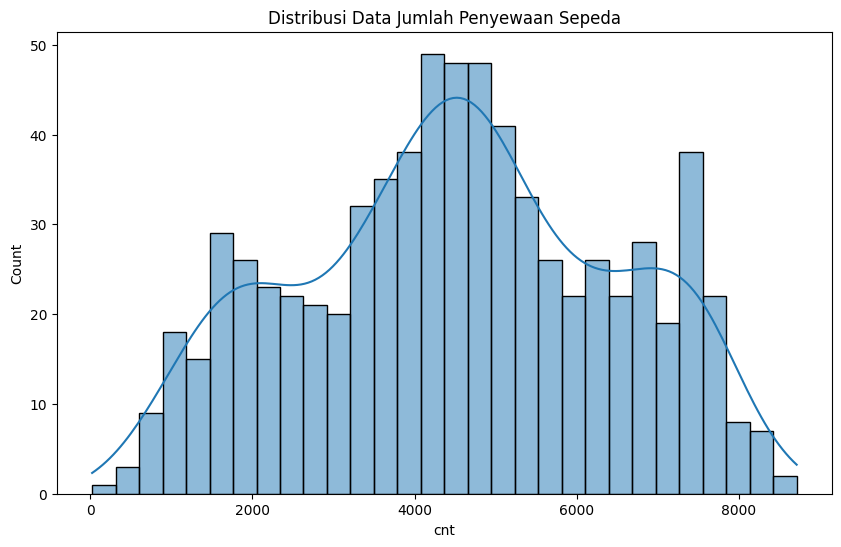

In [97]:
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title("Distribusi Data Jumlah Penyewaan Sepeda")
plt.show()

3.2 Statistik Deskriptif

In [98]:
print(day_df.describe())

                    dteday           yr  weathersit        temp         hum  \
count                  731   731.000000  731.000000  731.000000  731.000000   
mean   2012-01-01 00:00:00  2011.500684    1.395349   20.314637   62.792066   
min    2011-01-01 00:00:00  2011.000000    1.000000    2.000000    0.000000   
25%    2011-07-02 12:00:00  2011.000000    1.000000   14.000000   52.000000   
50%    2012-01-01 00:00:00  2012.000000    1.000000   20.000000   63.000000   
75%    2012-07-01 12:00:00  2012.000000    2.000000   27.000000   73.000000   
max    2012-12-31 00:00:00  2012.000000    3.000000   35.000000   97.000000   
std                    NaN     0.500342    0.544894    7.531453   14.263585   

        windspeed       casual   registered          cnt  
count  731.000000   731.000000   731.000000   731.000000  
mean    12.767442   848.176471  3656.172367  4504.348837  
min      2.000000     2.000000    20.000000    22.000000  
25%      9.000000   315.500000  2497.000000  3152.00

3.3 Korelasi Antar Variabel

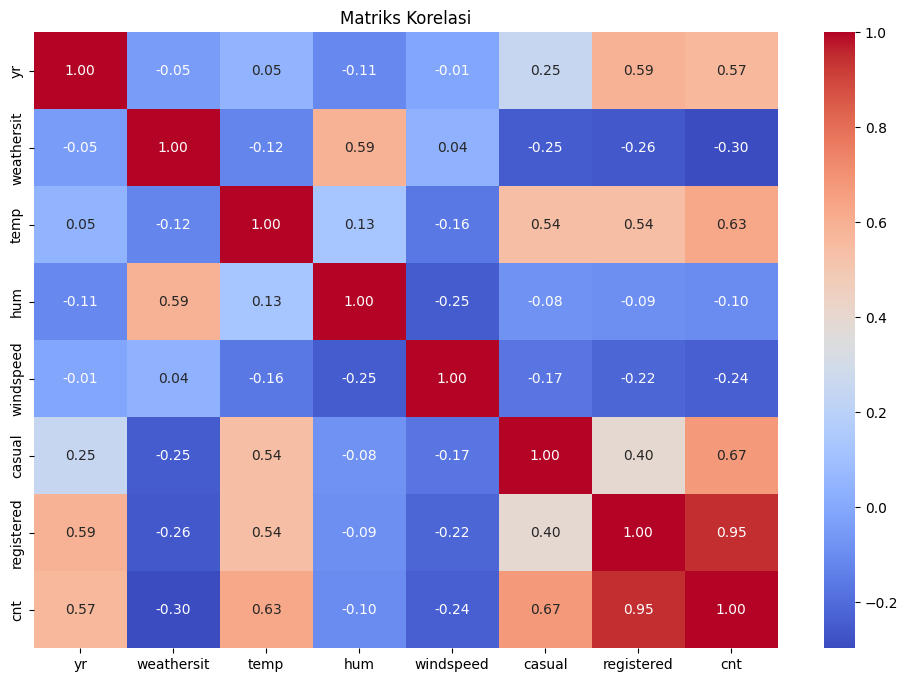

In [99]:
data_corr = day_df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(data_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

3.4 Korelasi Antar Kolom

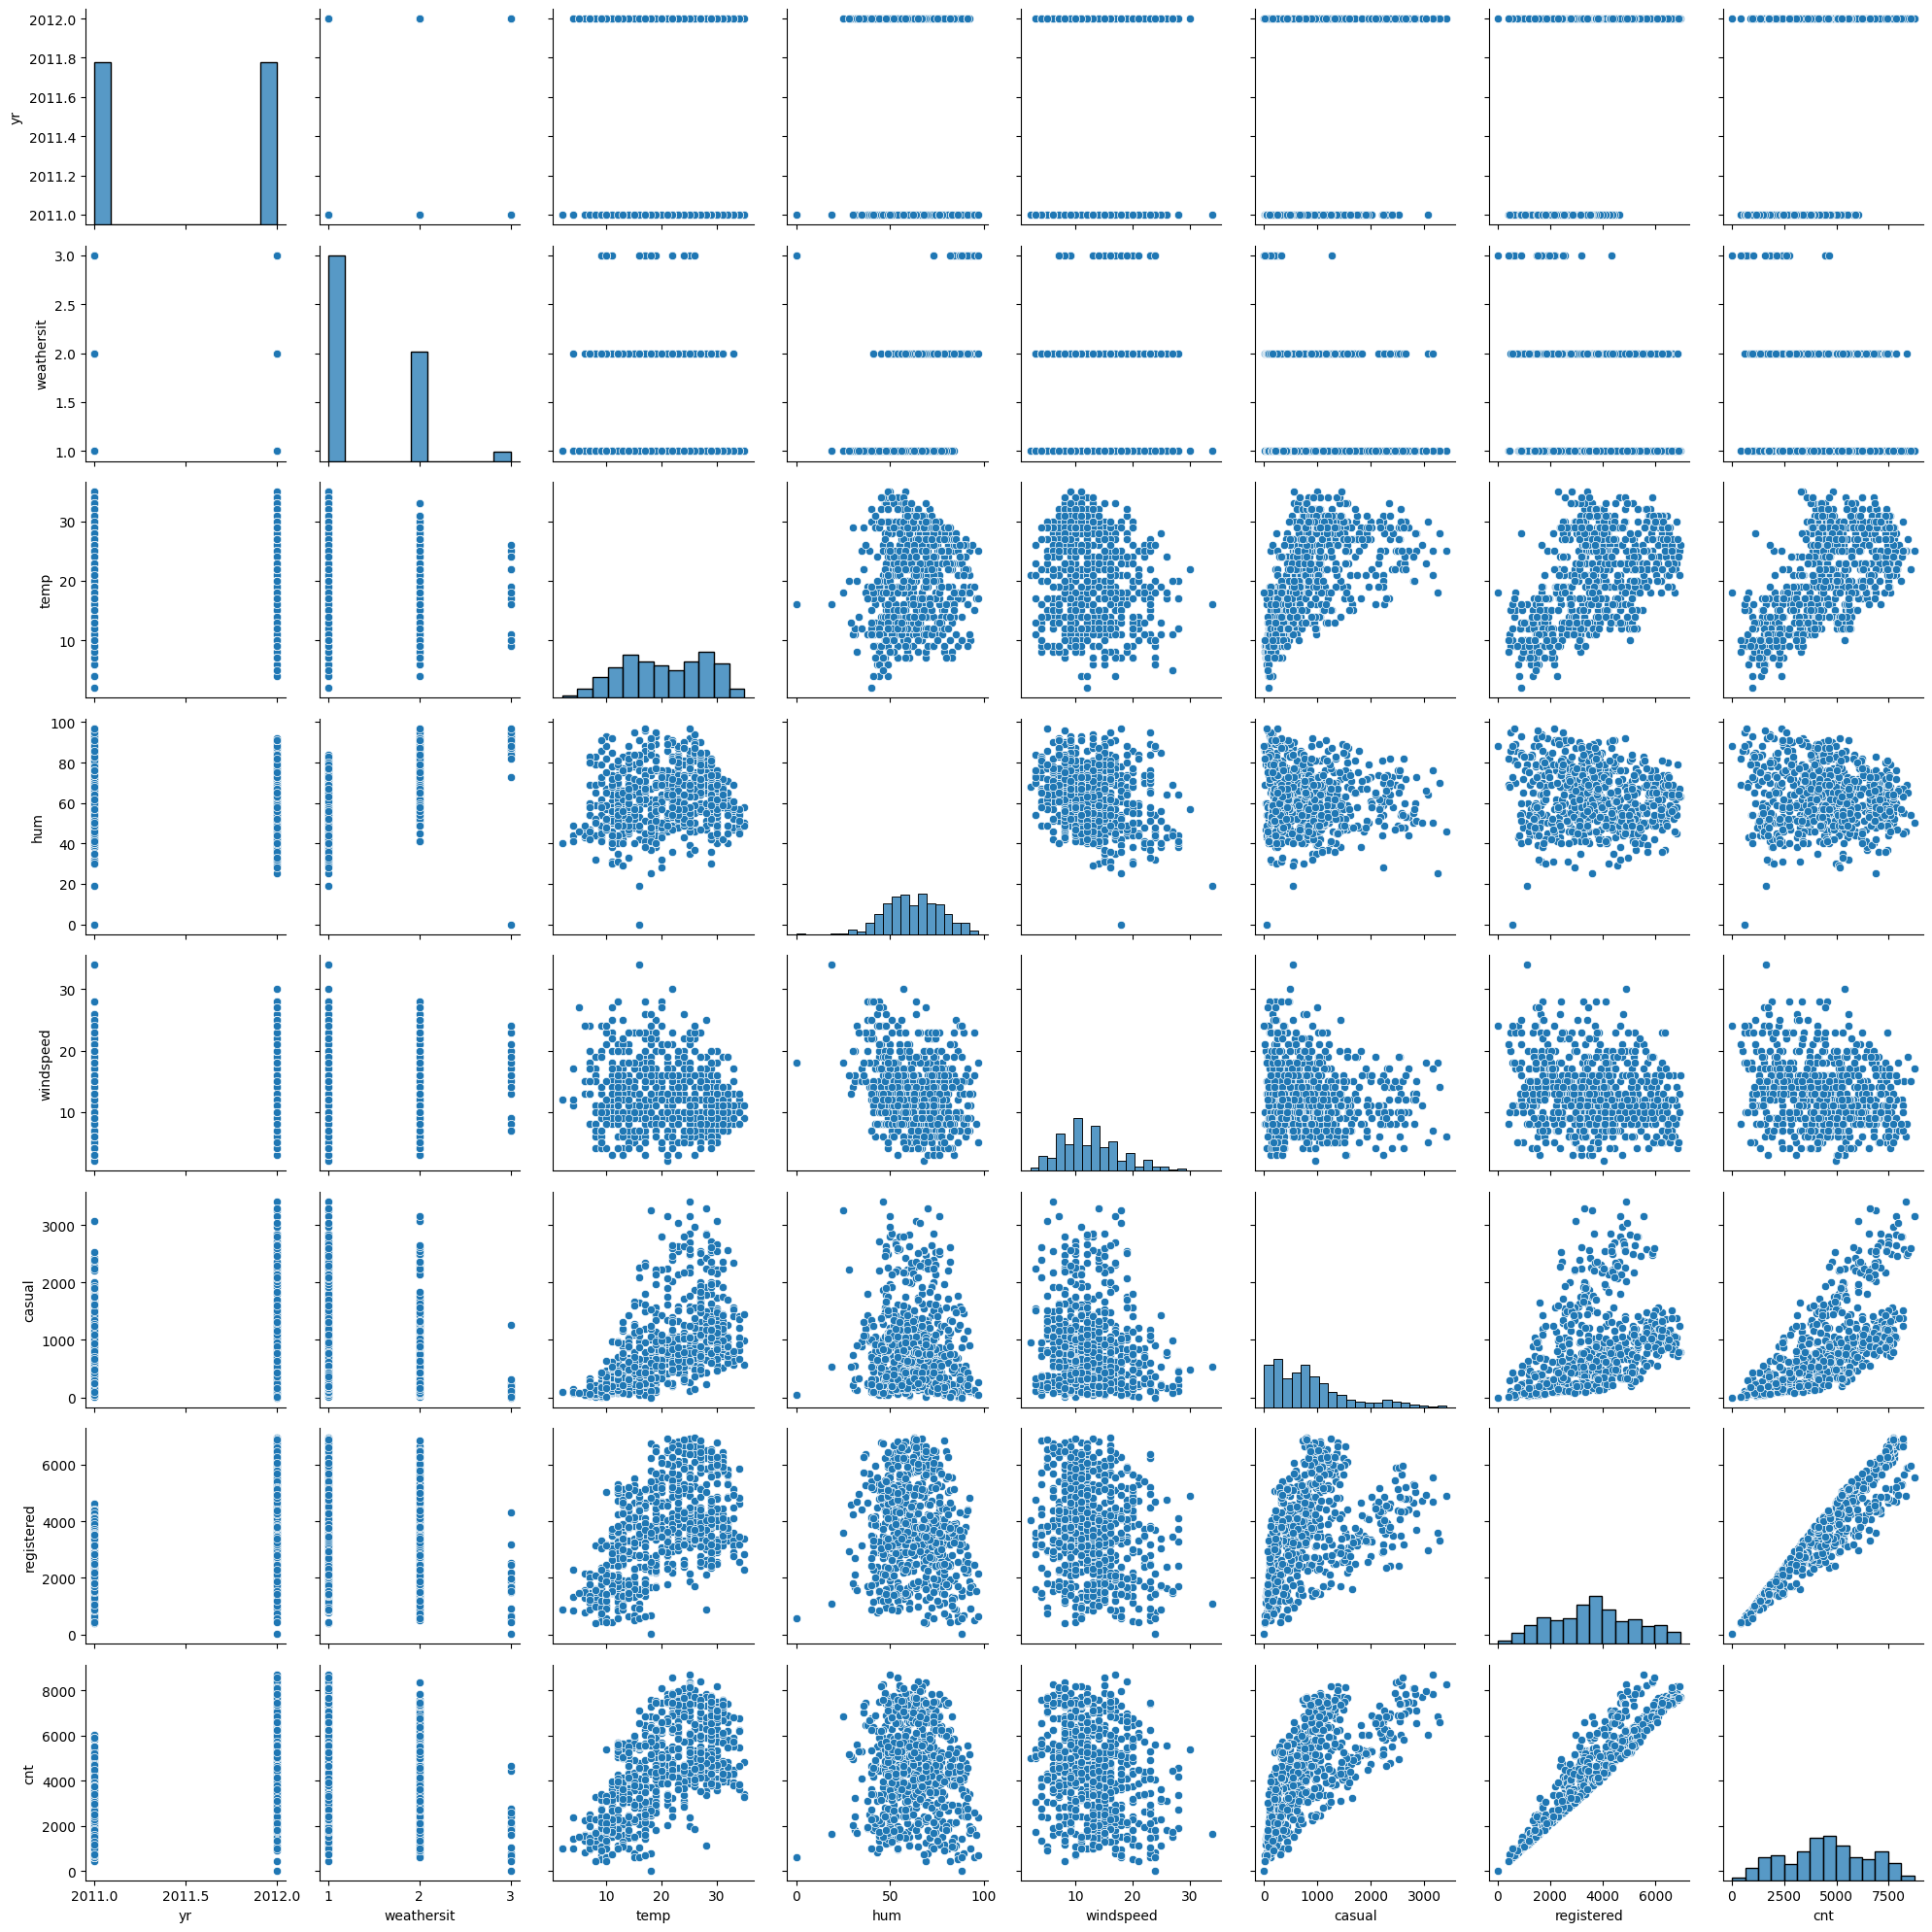

In [100]:
sns.pairplot(day_df)
plt.tight_layout()
plt.show()

3.5 Pengaruh Cuaca

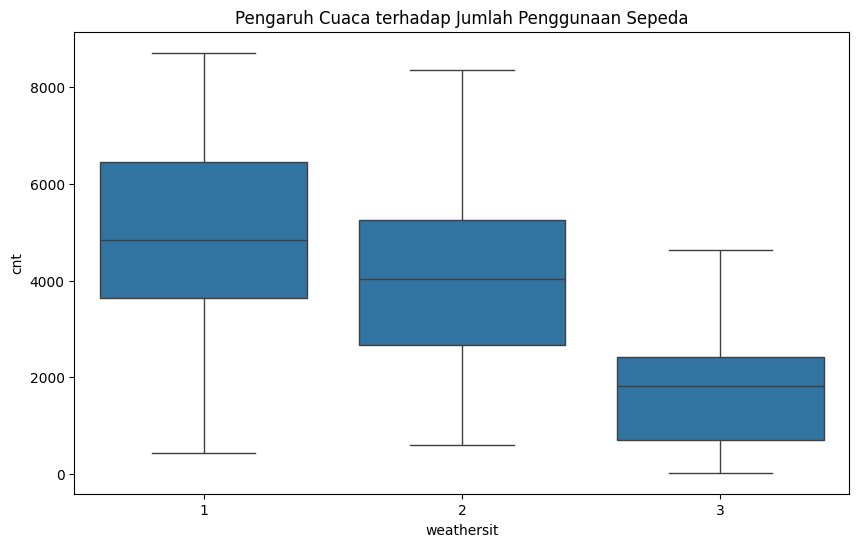

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, x='weathersit', y='cnt')
plt.title("Pengaruh Cuaca terhadap Jumlah Penggunaan Sepeda")
plt.show()


3.6 Analisis Tren

<ipython-input-102-69c7eb82c057>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


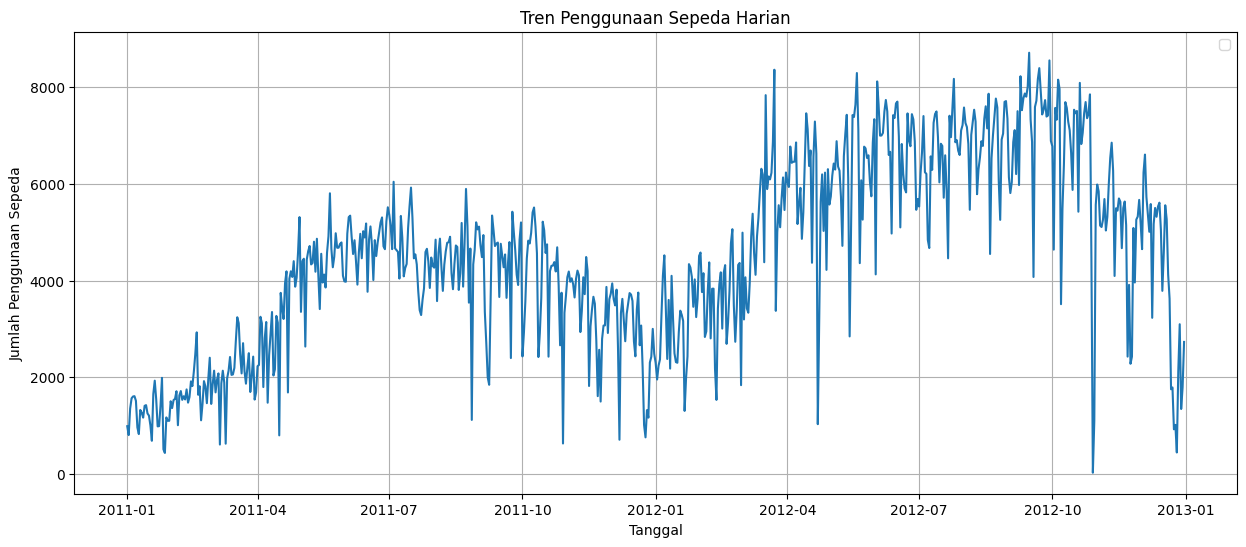

In [102]:
import matplotlib.pyplot as plt  # Impor matplotlib
import pandas as pd  # Impor pandas jika belum

# Pastikan dteday dalam format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

plt.figure(figsize=(15, 6))
plt.plot(day_df['dteday'], day_df['cnt'])
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penggunaan Sepeda")
plt.title("Tren Penggunaan Sepeda Harian")
plt.legend()
plt.grid()
plt.show()


3.7 Perbandingan Hari Kerja dan Akhir Pekan

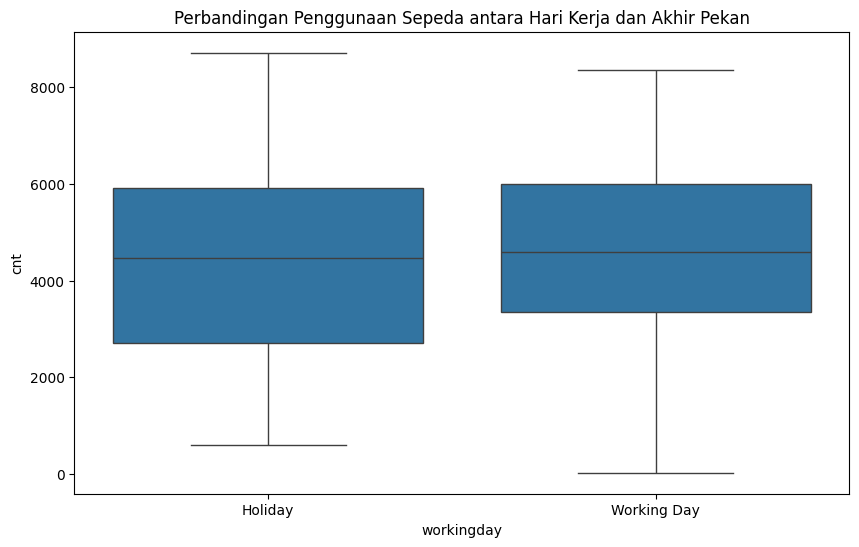

In [103]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, x='workingday', y='cnt')
plt.title("Perbandingan Penggunaan Sepeda antara Hari Kerja dan Akhir Pekan")
plt.show()


3.8 Analisis Kategori Hari

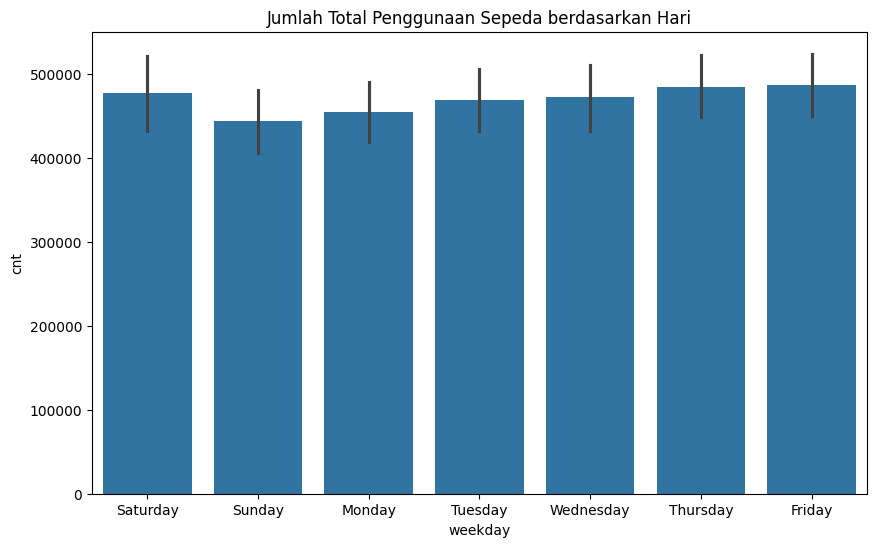

In [104]:
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='weekday', y='cnt', estimator=sum)
plt.title("Jumlah Total Penggunaan Sepeda berdasarkan Hari")
plt.show()

**Insight:**

- Distribusi jumlah penyewaan sepeda menunjukkan pola yang mendekati distribusi normal dengan sedikit skewness ke kanan. Ini menunjukkan bahwa sebagian besar hari memiliki jumlah penyewaan yang moderat, dengan beberapa hari mengalami lonjakan tinggi.
- Dari matriks korelasi, terlihat bahwa variabel `temp` (temperatur) memiliki korelasi positif yang cukup kuat terhadap jumlah penyewaan sepeda (`cnt`). Ini menunjukkan bahwa cuaca yang lebih hangat cenderung meningkatkan jumlah penyewaan.
- Cuaca buruk (`weathersit = 3 atau 4`) secara signifikan mengurangi jumlah penyewaan sepeda, sebagaimana ditunjukkan oleh boxplot yang memperlihatkan nilai median yang lebih rendah pada kategori cuaca buruk.
- Hari kerja memiliki jumlah penyewaan yang lebih tinggi dibandingkan akhir pekan, dengan distribusi yang lebih tersebar. Ini mungkin dikarenakan pengguna yang terdaftar (registered users) lebih banyak menggunakan sepeda untuk perjalanan kerja.


### 4. Visualization & Explanatory Analysis

In [105]:
dataclean_analisis = "/content/drive/My Drive/Bike Sharing Dataset/dataclean_analisis.csv"
df = pd.read_csv(dataclean_analisis)
df

# Cek beberapa 5 baris pertama
print(df.head())

       dteday  season    yr     mnth      holiday    weekday   workingday  \
0  2011-01-01  Spring  2011  January  Not Holiday   Saturday      Holiday   
1  2011-01-02  Spring  2011  January  Not Holiday     Sunday      Holiday   
2  2011-01-03  Spring  2011  January  Not Holiday     Monday  Working Day   
3  2011-01-04  Spring  2011  January  Not Holiday    Tuesday  Working Day   
4  2011-01-05  Spring  2011  January  Not Holiday  Wednesday  Working Day   

   weathersit  temp  hum  windspeed  casual  registered   cnt  
0           2    14   81         11     331         654   985  
1           2    15   70         17     131         670   801  
2           1     8   44         17     120        1229  1349  
3           1     8   59         11     108        1454  1562  
4           1     9   44         13      82        1518  1600  


### Pertanyaan 1: Bagaimana tren bulanan penggunaan sepeda dari tahun 2011 hingga 2012?

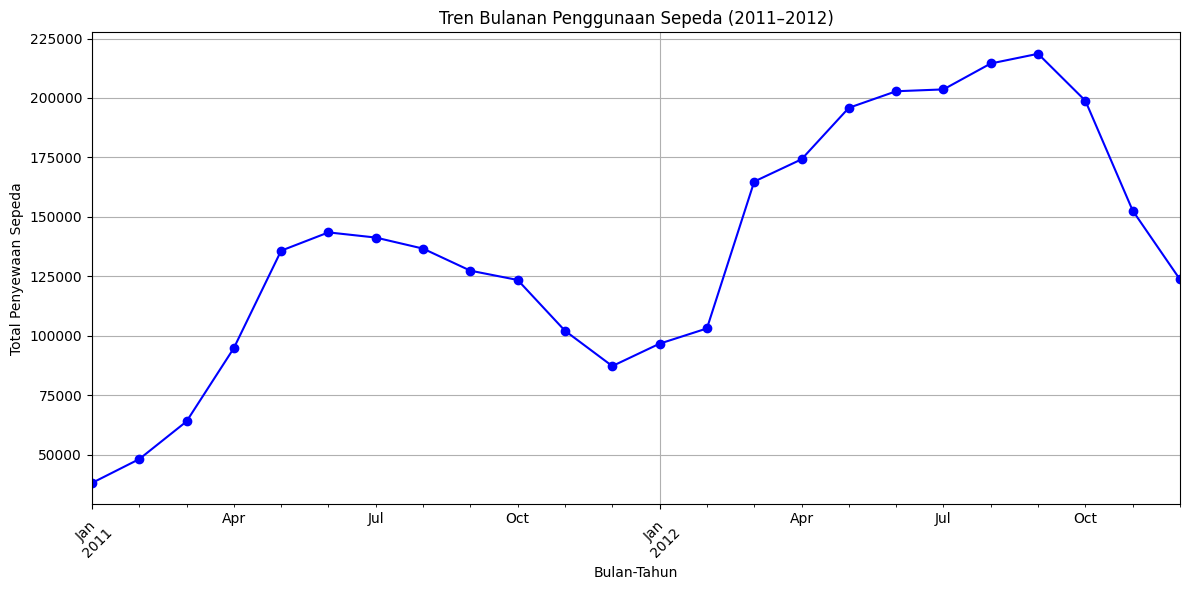

In [106]:
# Pastikan kolom tanggal dalam format datetime
df['dteday'] = pd.to_datetime(df['dteday'], errors='coerce')

# Filter hanya tahun 2011 dan 2012
df_filtered = df[df['dteday'].dt.year.isin([2011, 2012])].copy()

# Buat kolom 'year_month' untuk agregasi bulanan
df_filtered['year_month'] = df_filtered['dteday'].dt.to_period('M')

# Hitung total peminjaman per bulan
monthly_trend = df_filtered.groupby('year_month')['cnt'].sum()

# Plot hasilnya
plt.figure(figsize=(12, 6))
monthly_trend.plot(marker='o', linestyle='-', color='blue')
plt.title("Tren Bulanan Penggunaan Sepeda (2011–2012)")
plt.xlabel("Bulan-Tahun")
plt.ylabel("Total Penyewaan Sepeda")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [107]:
# Tren penyewaan bulanan
df["month_year"] = df["dteday"].dt.strftime("%Y-%m")  # Mengubah format tanggal menjadi tahun-bulan
monthly_rentals = df.groupby("month_year")[["casual", "registered", "cnt"]].sum()
print("Tren penyewaan bulanan:\n", monthly_rentals)

Tren penyewaan bulanan:
             casual  registered     cnt
month_year                            
2011-01       3073       35116   38189
2011-02       6242       41973   48215
2011-03      12826       51219   64045
2011-04      22346       72524   94870
2011-05      31050      104771  135821
2011-06      30612      112900  143512
2011-07      36452      104889  141341
2011-08      28842      107849  136691
2011-09      26545      100873  127418
2011-10      25222       98289  123511
2011-11      15594       86573  102167
2011-12       8448       78875   87323
2012-01       8969       87775   96744
2012-02       8721       94416  103137
2012-03      31618      133257  164875
2012-04      38456      135768  174224
2012-05      44235      151630  195865
2012-06      43294      159536  202830
2012-07      41705      161902  203607
2012-08      43197      171306  214503
2012-09      43778      174795  218573
2012-10      34538      164303  198841
2012-11      21009      131655  152664


In [108]:
# Analisis jumlah penyewaan berdasarkan tahun
rental_by_year = df.groupby("yr")[["registered", "casual", "cnt"]].sum()
print("Total penyewaan berdasarkan tahun:\n", rental_by_year)

Total penyewaan berdasarkan tahun:
       registered  casual      cnt
yr                               
2011      995851  247252  1243103
2012     1676811  372765  2049576


### Pertanyaan 2: Apa saja tiga variabel numerik yang paling berkorelasi dengan jumlah peminjaman sepeda bulanan pada tahun 2012?"

Tiga variabel numerik yang paling berkorelasi dengan jumlah peminjaman sepeda bulanan (2012):
registered    0.991995
casual        0.965751
temp          0.899422
Name: cnt, dtype: float64


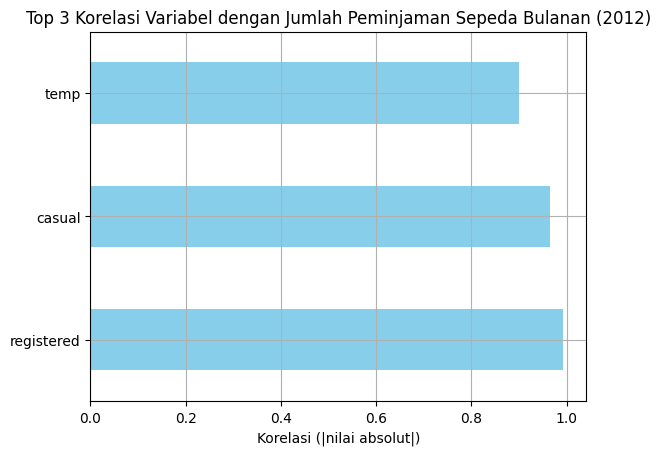

In [109]:
# Filter data untuk tahun 2012
df_2012 = df[df['dteday'].dt.year == 2012].copy()

# Buat kolom 'year_month' untuk agregasi bulanan
df_2012['year_month'] = df_2012['dteday'].dt.to_period('M')

# Agregasi bulanan: ambil rata-rata per bulan untuk semua kolom numerik
monthly_avg = df_2012.groupby('year_month').mean(numeric_only=True)

# Hitung korelasi dengan 'cnt'
correlation = monthly_avg.corr()['cnt'].drop('cnt')  # Drop 'cnt' agar tidak membandingkan dengan dirinya sendiri

# Ambil 3 variabel dengan korelasi tertinggi
top3_corr = correlation.abs().sort_values(ascending=False).head(3)

# Tampilkan hasil
print("Tiga variabel numerik yang paling berkorelasi dengan jumlah peminjaman sepeda bulanan (2012):")
print(top3_corr)

top3_corr.plot(kind='barh', color='skyblue')
plt.title("Top 3 Korelasi Variabel dengan Jumlah Peminjaman Sepeda Bulanan (2012)")
plt.xlabel("Korelasi (|nilai absolut|)")
plt.grid(True)
plt.show()

### Pertanyaan 3: Bagaimana segmentasi pengguna berdasarkan pola peminjaman mereka?

In [110]:
df[df['dteday'].dt.year == 2012]['season'].unique()


array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [111]:
# Mapping balik dari nama musim ke angka
reverse_season_map = {
    'Spring': 1,
    'Summer': 2,
    'Fall': 3,
    'Winter': 4
}

# Ubah season menjadi int sesuai mapping
df['season'] = df['season'].map(reverse_season_map)

print(df['season'].unique())


[1 2 3 4]


In [112]:
df = df.dropna(subset=['season'])


In [114]:
df['season'] = df['season'].fillna(0).astype(int)

In [115]:
df['dteday'] = pd.to_datetime(df['dteday'], errors='coerce')
df['season'] = df['season'].astype(int)  # Pastikan season integer

# Filter ulang
fall_2012_df = df[(df['dteday'].dt.year == 2012) & (df['season'] == 3)].copy()


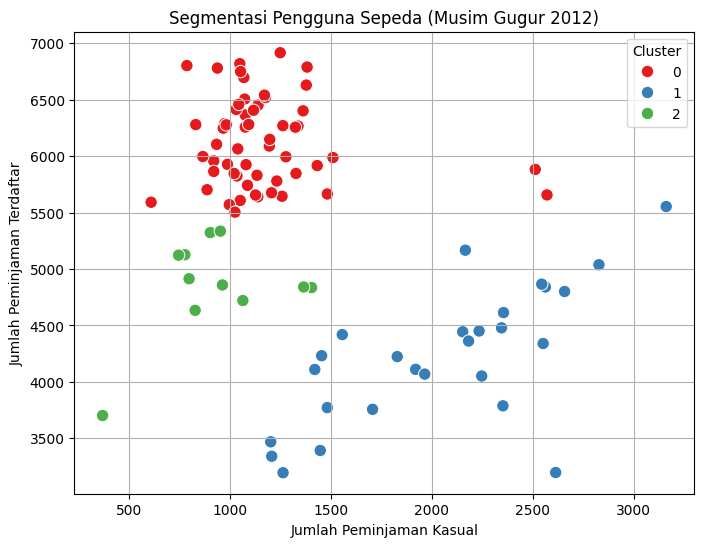

In [116]:
# Filter untuk musim gugur (season == 3) dan tahun 2012
fall_2012_df = df[(df['dteday'].dt.year == 2012) & (df['season'] == 3)].copy()

# Ambil fitur yang akan dipakai untuk clustering
segmentation_data = fall_2012_df[['casual', 'registered']]

# Terapkan KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
fall_2012_df['Cluster'] = kmeans.fit_predict(segmentation_data)

# Visualisasi hasil segmentasi
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=fall_2012_df,
    x='casual',
    y='registered',
    hue='Cluster',
    palette='Set1',
    s=80
)
plt.title("Segmentasi Pengguna Sepeda (Musim Gugur 2012)")
plt.xlabel("Jumlah Peminjaman Kasual")
plt.ylabel("Jumlah Peminjaman Terdaftar")
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

**Insight:**


- Pola penggunaan sepeda menunjukkan tren musiman yang sangat jelas, dengan puncak penggunaan yang terjadi pada musim panas (`Summer`) dan penurunan yang signifikan selama musim dingin (`Winter`). Visualisasi menunjukkan perbedaan antara musim-musim tersebut, dengan lebih banyak penyewaan terjadi pada musim yang lebih hangat. Dikarenakan kondisi cuaca yang lebih mendukung untuk bersepeda pada musim panas.


- Faktor-faktor yang paling mempengaruhi jumlah peminjaman sepeda adalah `temp`, `season`, dan `workingday`. Berdasarkan korelasi yang terlihat dalam heatmap, suhu yang lebih hangat, musim-musim tertentu (`spring` dan `summer`), serta hari kerja yang lebih sibuk cenderung meningkatkan jumlah peminjaman. Faktor-faktor ini menunjukkan bahwa cuaca yang baik dan kegiatan sehari-hari yang lebih padat mendorong lebih banyak orang untuk menyewa sepeda.

- Segmentasi pengguna menunjukkan bahwa pengguna terdaftar cenderung memiliki pola peminjaman yang lebih terstruktur dan stabil, sementara pengguna kasual menunjukkan pola yang lebih sporadis. Berdasarkan hasil segmentasi dengan KMeans, terlihat bahwa pengguna terdaftar lebih sering menyewa sepeda dalam jumlah besar dan teratur, sementara pengguna kasual lebih cenderung menyewa sepeda hanya pada kesempatan tertentu.


- Tren kenaikan jumlah penyewaan dari tahun 2011 ke 2012, yang menunjukkan adanya pertumbuhan dalam jumlah pengguna atau peningkatan popularitas layanan sepeda berbagi. Visualisasi tren bulanan menunjukkan kenaikan yang konsisten, yang bisa mengindikasikan bahwa layanan ini semakin diterima dan digunakan oleh masyarakat, dengan lebih banyak orang beralih ke sepeda sebagai alternatif transportasi yang efisien, ramah lingkungan dan praktis.

## Conclusion

1. Tren penyewaan sepeda meningkat signifikan dari 2011 ke 2012, dengan lonjakan mulai Maret dan puncak terjadi di bulan Agustus–September 2012. Ini menunjukkan pertumbuhan jumlah pengguna dan meningkatnya ketertarikan masyarakat terhadap layanan penyewaan sepeda.

2. Pola penggunaan sepeda sangat dipengaruhi musim, dengan jumlah penyewaan tertinggi terjadi saat musim panas, dan menurun drastis selama musim dingin. Suhu udara, musim, dan hari kerja terbukti menjadi faktor utama yang mendorong peningkatan aktivitas penyewaan, sedangkan cuaca buruk berdampak negatif terhadap jumlah peminjaman.

3. Mayoritas penyewaan berasal dari pengguna terdaftar, yang menyumbang sekitar 81% dari total peminjaman. Mereka menunjukkan perilaku penggunaan yang lebih konsisten dan terstruktur, dibandingkan pengguna kasual yang cenderung menyewa secara acak dan dalam jumlah lebih sedikit.

4. Distribusi penyewaan harian menunjukkan pola yang hampir normal, dengan beberapa hari mengalami lonjakan tinggi. Segmentasi pengguna menggunakan metode KMeans juga menguatkan perbedaan karakteristik antara pengguna kasual dan terdaftar selama musim gugur 2012.

